In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

notebook_dir = os.getcwd()
csv_name = '../data_PAM/mushra.csv'
csv_path = os.path.join(notebook_dir, csv_name)

df = pd.read_csv(csv_path, index_col=0)
total_participants = df['email'].nunique()
print(f'Total participants: {total_participants}')

#..

Total participants: 57


## Jiales code with Pandas 1.3

In [38]:
trial_ids = df['trial_id'].unique()
stats_df = pd.DataFrame(columns=['config', 'trial_id', 'algo', 'mean_rating', 'std_rating', 'mean_rating_time', 'std_rating_time'])
algo_names = df['rating_stimulus'].unique()
for trial_id in trial_ids:
    trial_df = df[df['trial_id'] == trial_id]
    for algo in algo_names:
        ratings = trial_df[trial_df['rating_stimulus'] == algo]['rating_score']
        rating_times = trial_df[trial_df['rating_stimulus'] == algo]['rating_time']
        mean_rating = ratings.mean()
        std_rating = ratings.std()
        mean_rating_time = rating_times.mean()
        std_rating_time = rating_times.std()
        stats_df = stats_df.append({'config': trial_id.split('_')[0],'trial_id': trial_id.split('_')[1], 'algo': algo, 'mean_rating': mean_rating, 'std_rating': std_rating, 'mean_rating_time': mean_rating_time, 'std_rating_time': std_rating_time}, ignore_index=True)


AttributeError: 'DataFrame' object has no attribute 'append'

## WITH PANDAS 2.0

In [39]:
import os
import pandas as pd
import numpy as np

# Set up paths
notebook_dir = os.getcwd()
csv_name = '../data_PAM/mushra.csv'
csv_path = os.path.join(notebook_dir, csv_name)

# Load data
df = pd.read_csv(csv_path, index_col=0)
total_participants = df['email'].nunique()
print(f'Total participants: {total_participants}')

# Unique trial IDs and algorithm names
trial_ids = df['trial_id'].unique()
algo_names = df['rating_stimulus'].unique()

# List to accumulate rows before converting to DataFrame
stats_list = []

# Loop over trials and algorithms
for trial_id in trial_ids:
    trial_df = df[df['trial_id'] == trial_id]
    for algo in algo_names:
        ratings = trial_df[trial_df['rating_stimulus'] == algo]['rating_score']
        rating_times = trial_df[trial_df['rating_stimulus'] == algo]['rating_time']
        mean_rating = ratings.mean()
        std_rating = ratings.std()
        mean_rating_time = rating_times.mean()
        std_rating_time = rating_times.std()

        # Append dictionary to the list
        stats_list.append({
            'config': trial_id.split('_')[0],
            'trial_id': trial_id.split('_')[1],
            'algo': algo,
            'mean_rating': mean_rating,
            'std_rating': std_rating,
            'mean_rating_time': mean_rating_time,
            'std_rating_time': std_rating_time
        })

# Convert list to DataFrame
stats_df = pd.DataFrame(stats_list)


Total participants: 57


In [40]:
import pandas as pd

# Ensure numeric values by coercing errors
recap_df = recap_df.apply(pd.to_numeric, errors='coerce')

# Check if values are still numeric
print(recap_df.dtypes)

# Fill NaNs temporarily to debug
recap_df.fillna(0, inplace=True)

# Round values to 2 decimal places
recap_df = recap_df.round(2)

# Format as percentages (only for numeric values)
recap_df = recap_df.map(lambda x: f"{x:.2f}%" if isinstance(x, (int, float)) else x)

# Display the table in Jupyter Notebook
display(recap_df)


algo
mix          float64
reference    float64
fastmnmf2    float64
irlma        float64
spleeter     float64
demuc        float64
dtype: object


algo                        mix reference fastmnmf2  irlma spleeter  demuc
config    trial_id                                                        
classical clarinette      0.00%     0.00%     0.00%  0.00%    0.00%  0.00%
          piano           0.00%     0.00%     0.00%  0.00%    0.00%  0.00%
          reconstruction  0.00%     0.00%     0.00%  0.00%    0.00%  0.00%
          violin          0.00%     0.00%     0.00%  0.00%    0.00%  0.00%
jazz      bass            0.00%     0.00%     0.00%  0.00%    0.00%  0.00%
          drum            0.00%     0.00%     0.00%  0.00%    0.00%  0.00%
          piano           0.00%     0.00%     0.00%  0.00%    0.00%  0.00%
          reconstruction  0.00%     0.00%     0.00%  0.00%    0.00%  0.00%
          saxophone       0.00%     0.00%     0.00%  0.00%    0.00%  0.00%
          voice           0.00%     0.00%     0.00%  0.00%    0.00%  0.00%

# participants analysis

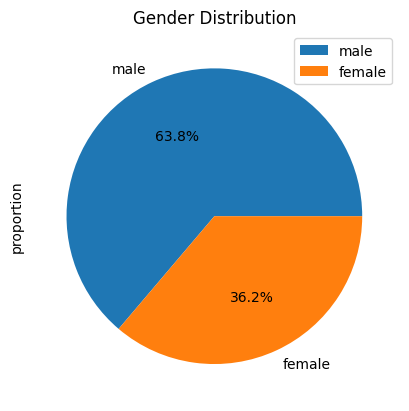

In [41]:
# gendar ratio
gendar_ratio = df['gender'].value_counts(normalize=True)
plt.figure()
gendar_ratio.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.legend()
plt.show()


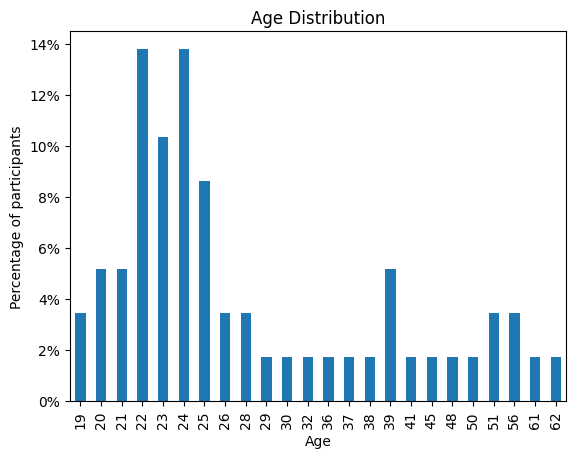

In [42]:
import matplotlib.pyplot as plt

# Age processing: set any age > 100 to 30
df['age'] = df['age'].apply(lambda x: 30 if x > 100 else x) 

# Compute normalized age distribution (convert to percentage)
age_distribution = df['age'].value_counts(normalize=True).sort_index() * 100  # Convert to percentage

# Plot
plt.figure()
age_distribution.plot(kind='bar')

# Titles and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Percentage of participants')  # Updated Y-axis label

# Format Y-axis ticks as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.show()


# rating analyses

/var/folders/yt/s8nyrxtj4nvfs519r5qfl1040000gn/T/ipykernel_29288/2095948089.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/yt/s8nyrxtj4nvfs519r5qfl1040000gn/T/ipykernel_29288/2095948089.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/yt/s8nyrxtj4nvfs519r5qfl1040000gn/T/ipykernel_29288/2095948089.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/yt/s8nyrxtj4nvfs519r5qfl1040000gn/T/ipykernel_29288/2095948089.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]


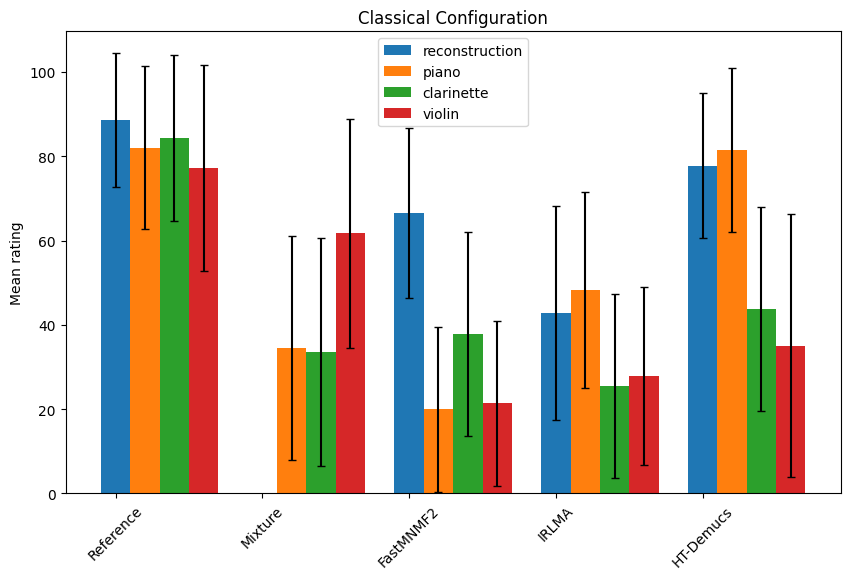

In [29]:
config = 'classical'

fig, ax = plt.subplots(figsize=(10, 6))

algo_names = ['reference', 'mix', 'fastmnmf2', 'irlma', 'demuc']
trial_ids = stats_df[stats_df['config']==config]['trial_id'].unique()

bar_width = 0.8 / len(trial_ids)

for i, trial_id in enumerate(trial_ids):
    trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
    # sort by algo_names which is an external list
    trial_df['algo_names'] = pd.Categorical(trial_df['algo'], categories=algo_names, ordered=True)
    trial_df = trial_df.sort_values(by='algo_names')
    # trial_df = trial_df.sort_values(by='algo')

    categories = trial_df['algo'][0:5]
    values = trial_df['mean_rating'][0:5]
    errors = trial_df['std_rating'][0:5]
    # ax.bar(categories, values, yerr=errors, label=label_name)

    x_positions = np.arange(len(categories)) + i * bar_width
    ax.bar(x_positions, values, yerr=errors, width=bar_width, label=trial_id, capsize=3)
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(['Reference', 'Mixture', 'FastMNMF2', 'IRLMA', 'HT-Demucs'])

ax.set_ylabel('Mean rating')
ax.set_title('Classical Configuration')
ax.legend()
plt.xticks(rotation=45)
plt.show()


/var/folders/yt/s8nyrxtj4nvfs519r5qfl1040000gn/T/ipykernel_29288/2832040686.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/yt/s8nyrxtj4nvfs519r5qfl1040000gn/T/ipykernel_29288/2832040686.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/yt/s8nyrxtj4nvfs519r5qfl1040000gn/T/ipykernel_29288/2832040686.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/yt/s8nyrxtj4nvfs519r5qfl1040000gn/T/ipykernel_29288/2832040686.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
/var/folders/yt/s8ny

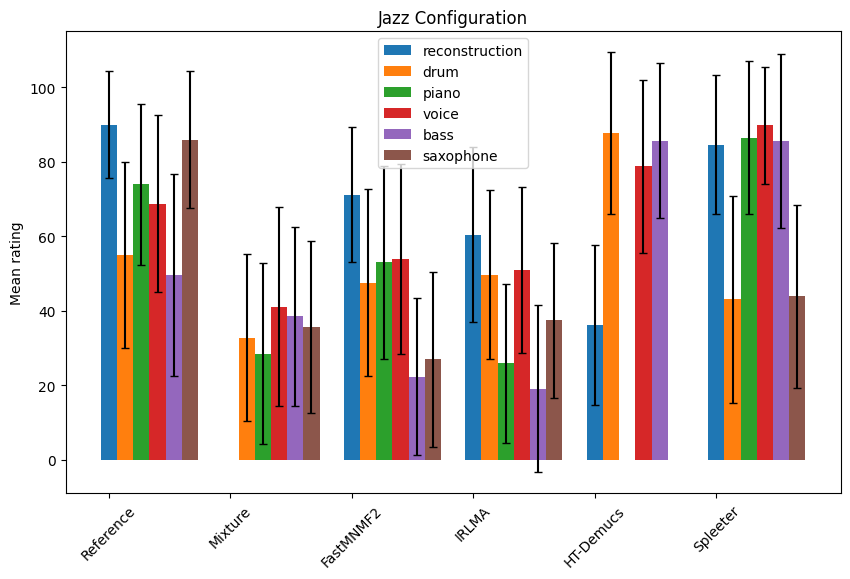

In [30]:
config = 'jazz'

fig, ax = plt.subplots(figsize=(10, 6))

algo_names = ['reference', 'mix', 'fastmnmf2', 'irlma', 'demuc', 'spleeter']
trial_ids = stats_df[stats_df['config']==config]['trial_id'].unique()

bar_width = 0.8 / len(trial_ids)

for i, trial_id in enumerate(trial_ids):
    trial_df = stats_df[stats_df['config'] == config][stats_df['trial_id'] == trial_id]
    # sort by algo_names which is an external list
    trial_df['algo_names'] = pd.Categorical(trial_df['algo'], categories=algo_names, ordered=True)
    trial_df = trial_df.sort_values(by='algo_names')
    # trial_df = trial_df.sort_values(by='algo')

    categories = trial_df['algo']
    values = trial_df['mean_rating']
    errors = trial_df['std_rating']
    # ax.bar(categories, values, yerr=errors, label=label_name)

    x_positions = np.arange(len(categories)) + i * bar_width
    ax.bar(x_positions, values, yerr=errors, width=bar_width, label=trial_id, capsize=3)
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(['Reference', 'Mixture', 'FastMNMF2', 'IRLMA', 'HT-Demucs', 'Spleeter'])

ax.set_ylabel('Mean rating')
ax.set_title('Jazz Configuration')
ax.legend()
plt.xticks(rotation=45)
plt.show()


# time for rating analyses

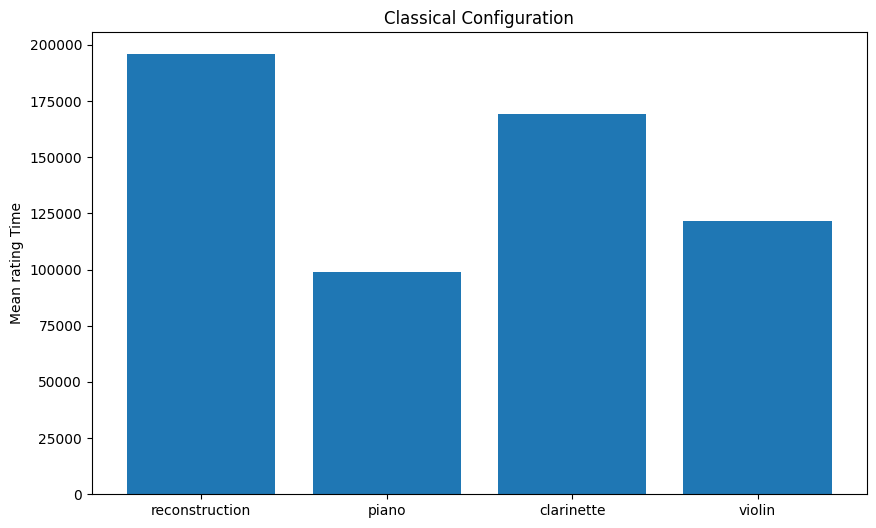

In [31]:
config = 'classical'

fig, ax = plt.subplots(figsize=(10, 6))

trial_ids = stats_df[stats_df['config']==config]['trial_id'].unique()

bar_width = 0.8 / len(trial_ids)

rating_times = stats_df[stats_df['config'] == config]['mean_rating_time'][stats_df['algo'] == 'fastmnmf2']
# rating_time_errors = stats_df[stats_df['config'] == config]['std_rating_time']
plt.bar(np.arange(len(rating_times)), rating_times)
plt.xticks(np.arange(len(rating_times)), trial_ids)
plt.ylabel('Mean rating Time')
plt.title('Classical Configuration')
plt.show()


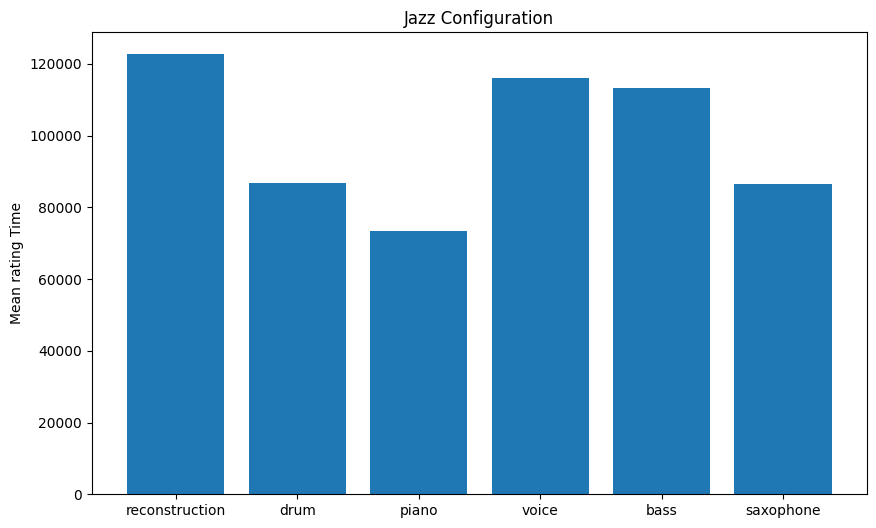

In [32]:
config = 'jazz'

fig, ax = plt.subplots(figsize=(10, 6))

trial_ids = stats_df[stats_df['config']==config]['trial_id'].unique()

bar_width = 0.8 / len(trial_ids)

rating_times = stats_df[stats_df['config'] == config]['mean_rating_time'][stats_df['algo'] == 'fastmnmf2']
# rating_time_errors = stats_df[stats_df['config'] == config]['std_rating_time']
plt.bar(np.arange(len(rating_times)), rating_times)
plt.xticks(np.arange(len(rating_times)), trial_ids)
plt.ylabel('Mean rating Time')
plt.title('Jazz Configuration')
plt.show()
